## 事後分布を求める
- データの分布
    - $\mu_{\text{truth}} = 0.25$のベルヌーイ分布
- 事前分布
    - ベータ分布

このとき，事後分布をプロットする

In [1]:
########## Packages ##########
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
# arange x
X = np.arange(start=0.01, stop=1, step=0.01)
Xlabel = list(np.linspace(0, 1, 6))
Ylabel = list(range(9))
# pre param
prm = [0.5, 1, 2]

In [3]:
# generate data from Bern dist with mu = 0.25
data = [stats.bernoulli.rvs(p=0.25, loc=0, size=3), stats.bernoulli.rvs(p=0.25, loc=0, size=7), stats.bernoulli.rvs(p=0.25, loc=0, size=40)]
# count 1
cnt = [0]
for i in range(len(data)):
    cnt.append(list(data[i]).count(1))
all = [0, 3, 10, 50]
# param
hat_a = []; hat_b = []
for j in range(len(cnt)):
    sm = 0
    for k in range(j+1):
        sm += cnt[k]
    a_i = []; b_i = []
    for i in range(len(prm)):
        a_i.append(prm[i] + sm)
        b_i.append(all[j] - sm + prm[i])
    hat_a.append(a_i); hat_b.append(b_i)

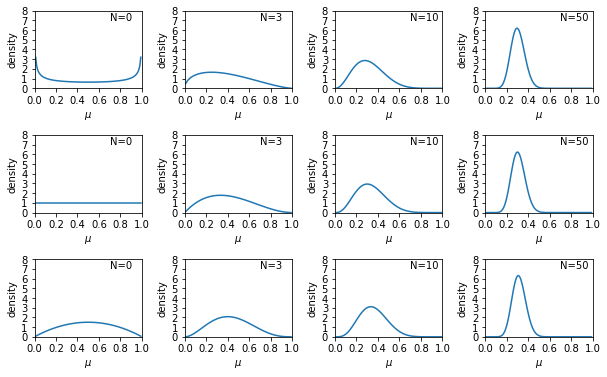

In [4]:
# post
hat_a_T = list(np.array(hat_a).T)
hat_b_T = list(np.array(hat_b).T)
fig, axes = plt.subplots(3, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(len(hat_a_T)):
    for j in range(len(hat_a_T[i])):
        post_dist = stats.beta.pdf(x=X, a=hat_a_T[i][j], b=hat_b_T[i][j])
        axes[i][j].plot(X, post_dist)
        axes[i][j].set_xlim([0, 1]); axes[i][j].set_ylim([0, 8])
        axes[i][j].set_xlabel(r"$\mu$"); axes[i][j].set_ylabel("density")
        axes[i][j].set_xticks(Xlabel); axes[i][j].set_yticks(Ylabel)
        axes[i][j].text(0.7,7,"N={}".format(all[j]))
plt.show()